<a href="https://colab.research.google.com/github/SP-TechForest/Heart_Disease_Detection_Using_MLJAR/blob/main/Heart_Disease_Detection_WithMLJAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><i>Neurological Pattern Analysis for Heart Disease Detection </b></i><br> 

---





> Automation is an essential asset to modernizing technology or process. Medical science is one of the profound fields in which AI can make wonders. Though, according to sources and our personal experience we can convict that healthcare still needs to adopt AI technologies thoroughly. We cannot deny that the stock of risk is very much high, because, we are directly dealing with human lives. One of the major issues is, we are not using modern methods to improve medical facilities. We have heard so many times that because of human error we lost lives. And here AI comes into the picture. We can use neurological data and can identify whether the patient is in trouble or not. Our final goal is to predict heart attacks. If we can predict heart attacks at least a few minutes before, we can save the lives of many people. Heart disease is the number one cause of death for most racial and ethnic groups. In 2015, it was responsible for 23.7 percent(Only in America). With the help of neurological data (data from human brains we can predict heart decease).






#<b><i>Problem Statement</b></i><br> 
---
<ul>
<li>
We are still unable to predict heart attacks. <b>[One person dies every 34 seconds in the United States from cardiovascular disease.1 About 697,000 people in the United States died from heart disease in 2020—that’s 1 in every 5 deaths].</b> These data is ensuring that we are not capable of detecting heart disease.</li>
<li>If we can predict at least the possibility of heart problems, then with the help of precautionary measures we can save millions of lives.</li>
<li>
With the help of neurological data, brain cell data, and various other data, we should at least identify that whether the patient is in danger of heart attack or not.<b>[Pattern Identification]</b></li>

</ul>

#<b><i>Hypothetical Solution</b></i><br>
---
>We can collect data from the brain and various other neurological data. With help of this data, we should make a classification model which can classify whether the patient has the possibility of heart disease or not. Moreover, we can identify various patterns or ways of having a heart attack so that we can handle patients in a better way. We use a Random forest classifier or support vector classifier. we can also use an artificial neural network to classify the possibility.<br> <br>

![](https://drive.google.com/uc?export=view&id=1FexferTVAyOzoEiH8iXzQrid18MLaUjd)


#<b><i>Implementation of Heart Disease Detection using MLJAR</b></i><br>
---

In [ ]:
#Installing the library call boruta for feature selection
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.5 MB/s 


In [ ]:
#Installing the library call mljar-supervised for supervised modeling
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 6.8 MB/s 
     |████████████████████████████████| 193.6 MB 53 kB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 575 kB 66.9 MB/s 
     |████████████████████████████████| 72 kB 948 kB/s 
     |████████████████████████████████| 348 kB 61.1 MB/s 
     |████████████████████████████████| 209 kB 60.4 MB/s 
     |████████████████████████████████| 81 kB 12.0 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 147 kB 79.1 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 112 kB 41.7 MB/s 
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.4-py3-none-any.whl size=147036

In [ ]:
#Import all required dependencies 
import pandas as pd 
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import classification_report
from sklearn.preprocessing import QuantileTransformer
from supervised import AutoML
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
#Store dataset into variable call data 
data = pd.read_csv('framingham.csv')

In [ ]:
#All the necessary information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
#Printing top 5 columns of dataset
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Education is not related to having heart disease or not. so, first i am removing education column. 

In [ ]:
data.drop(columns = ['education'], inplace = True) #Removing education column

In [ ]:
null_columns = data.columns[data.isna().any()] #Geting all the column's name which have null values 
null_columns

Index(['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'], dtype='object')

In [ ]:
#Make dataframe and show which columns have what percentage of null values 
def plot_null(temp_data):
  total = temp_data.isnull().sum().sort_values(ascending=False)
  percent_total = (temp_data.isnull().sum()/temp_data.isnull().count()).sort_values(ascending=False)*100
  missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
  return missing[missing['Total']>0]
missing_data = plot_null(data)
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


In [ ]:
#Visualizing all the columns with respected null values 
px.bar(x = missing_data.index, y = missing_data['Total'], title = "Missing values", labels={'x':"columns",'y':'Number of missing values'})

In [ ]:
#Dsiplaying the shape of original data 
#dataset has 4240 rows and 15 columns
data.shape

(4240, 15)

In [ ]:
data.dropna().shape # After removing null values we are still getting sufficient amount of data for analysis and prediction

(3751, 15)

In [ ]:
#removing all null values
data.dropna(inplace = True)
plot_null(data)

,Total,Percentage


In [ ]:
#Plot the graph of each columns, which will consist of histogram, scater plot, box plot and bar plot 
def plot_graph(df, variable,target):
    plt.figure(figsize=(20, 4))
    
    sns.set_style("dark")
    # histogram to check data distribution
    plt.subplot(1, 4, 1)
    sns.histplot(data = df,x = variable, bins=30,hue = target, multiple = 'stack')
    plt.title('Histogram')
    # scatterplot to visualize data ploting
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')  
    # boxplot to check outliers and statistics of data in each column
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    # barplot to analysis the reasons of heart attacks 
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    plt.show()

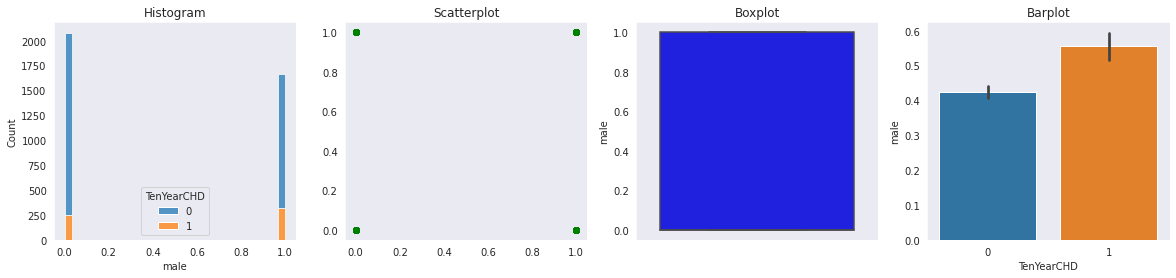

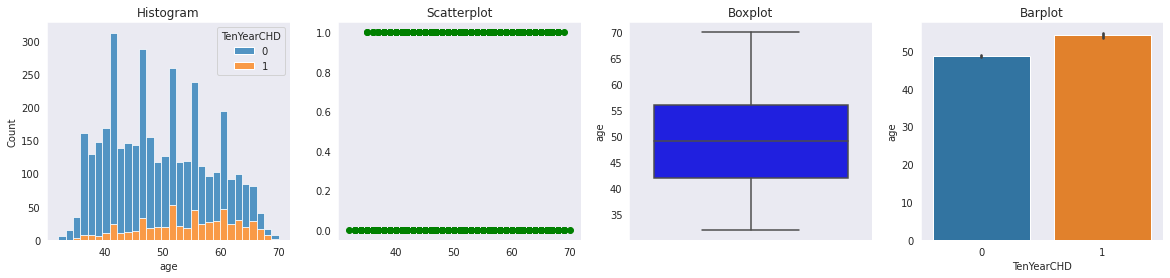

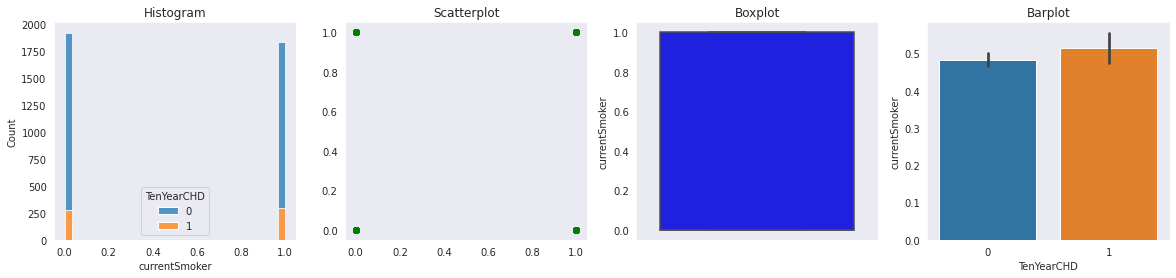

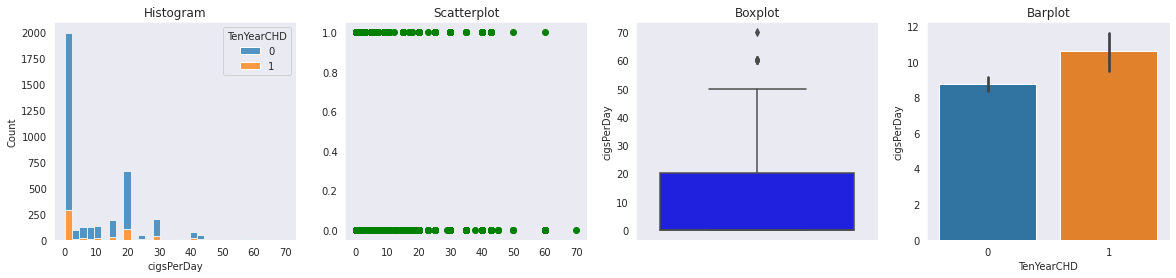

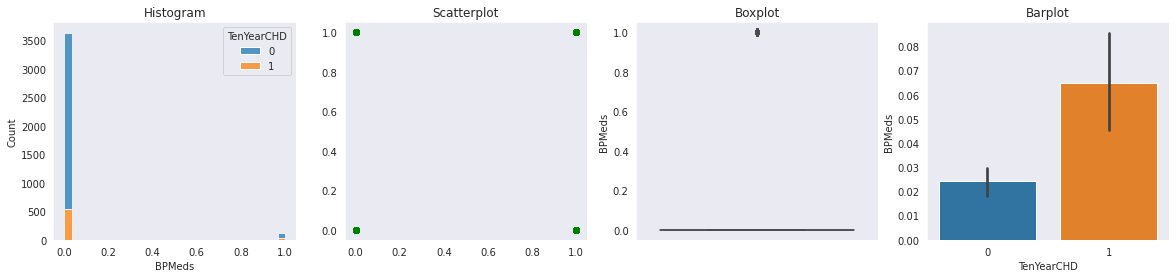

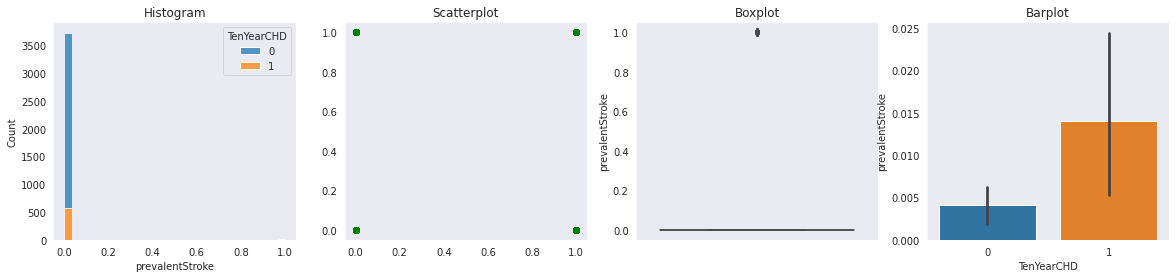

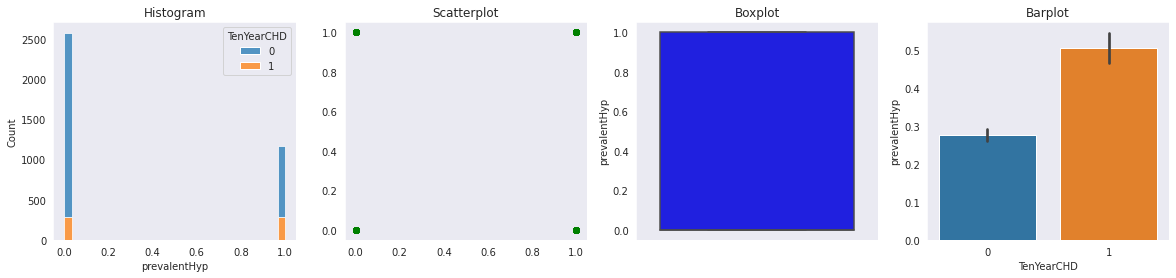

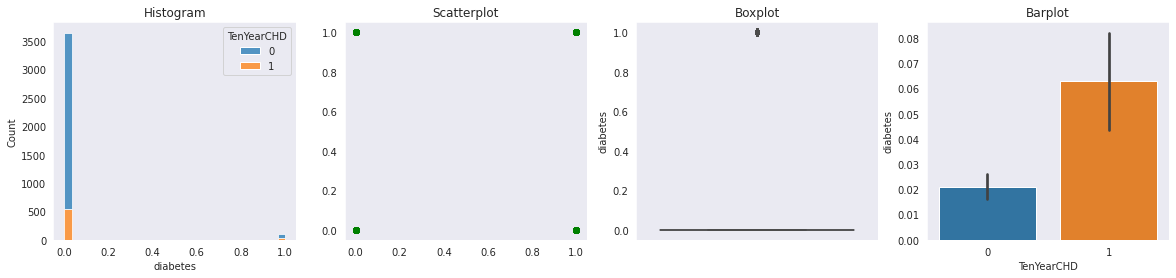

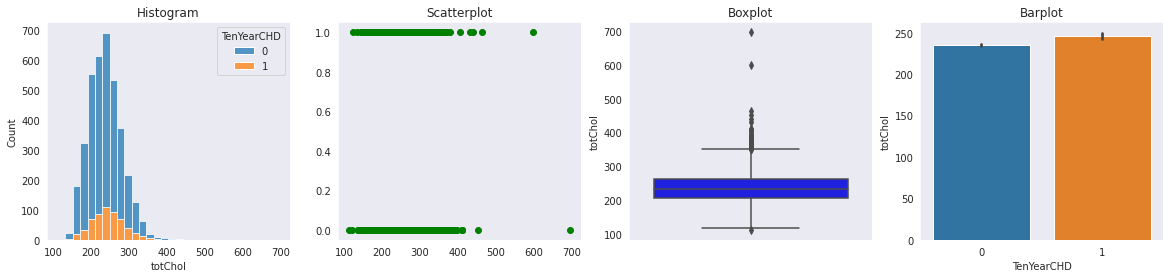

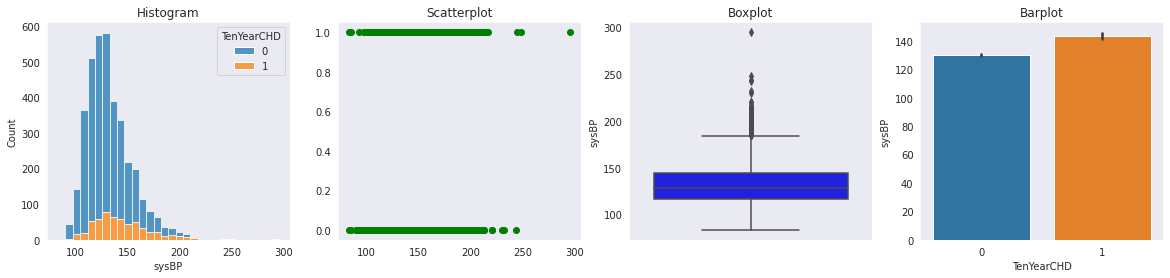

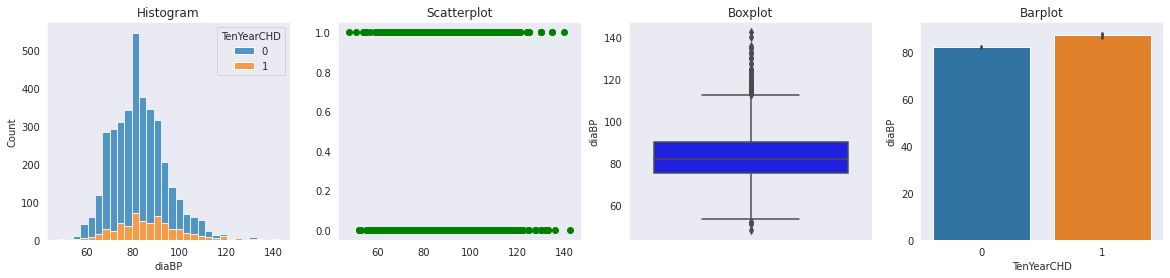

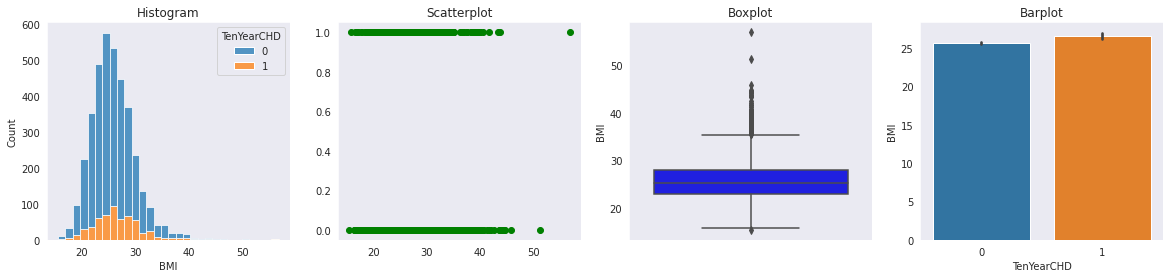

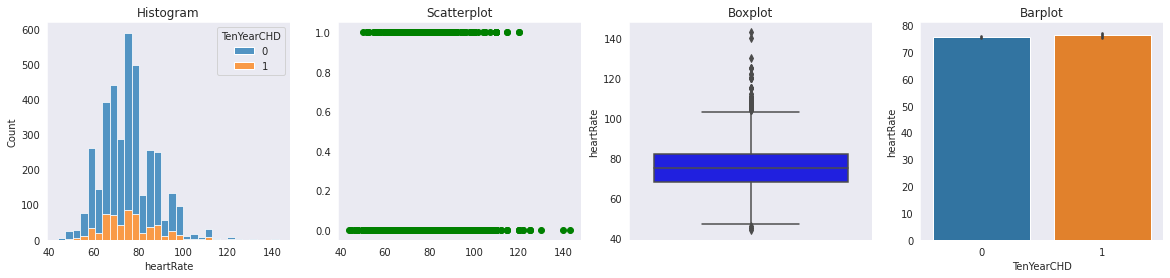

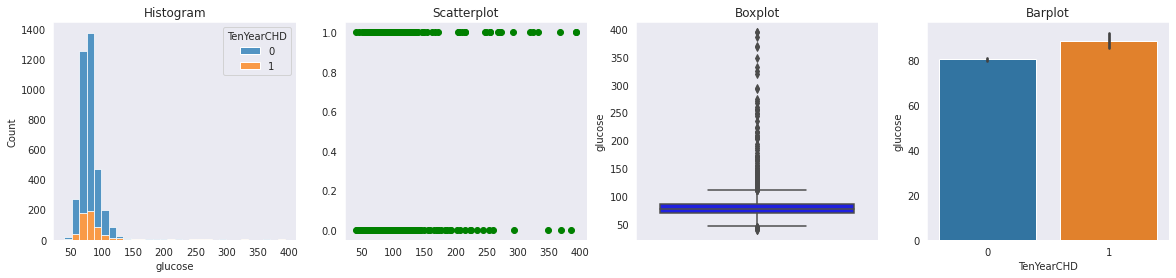

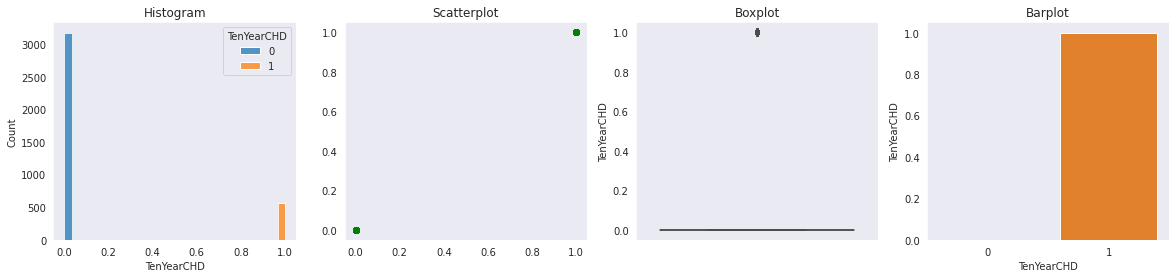

In [ ]:
#Visualize above plots for each columns
for variable in data:
    plot_graph(data , variable, 'TenYearCHD')

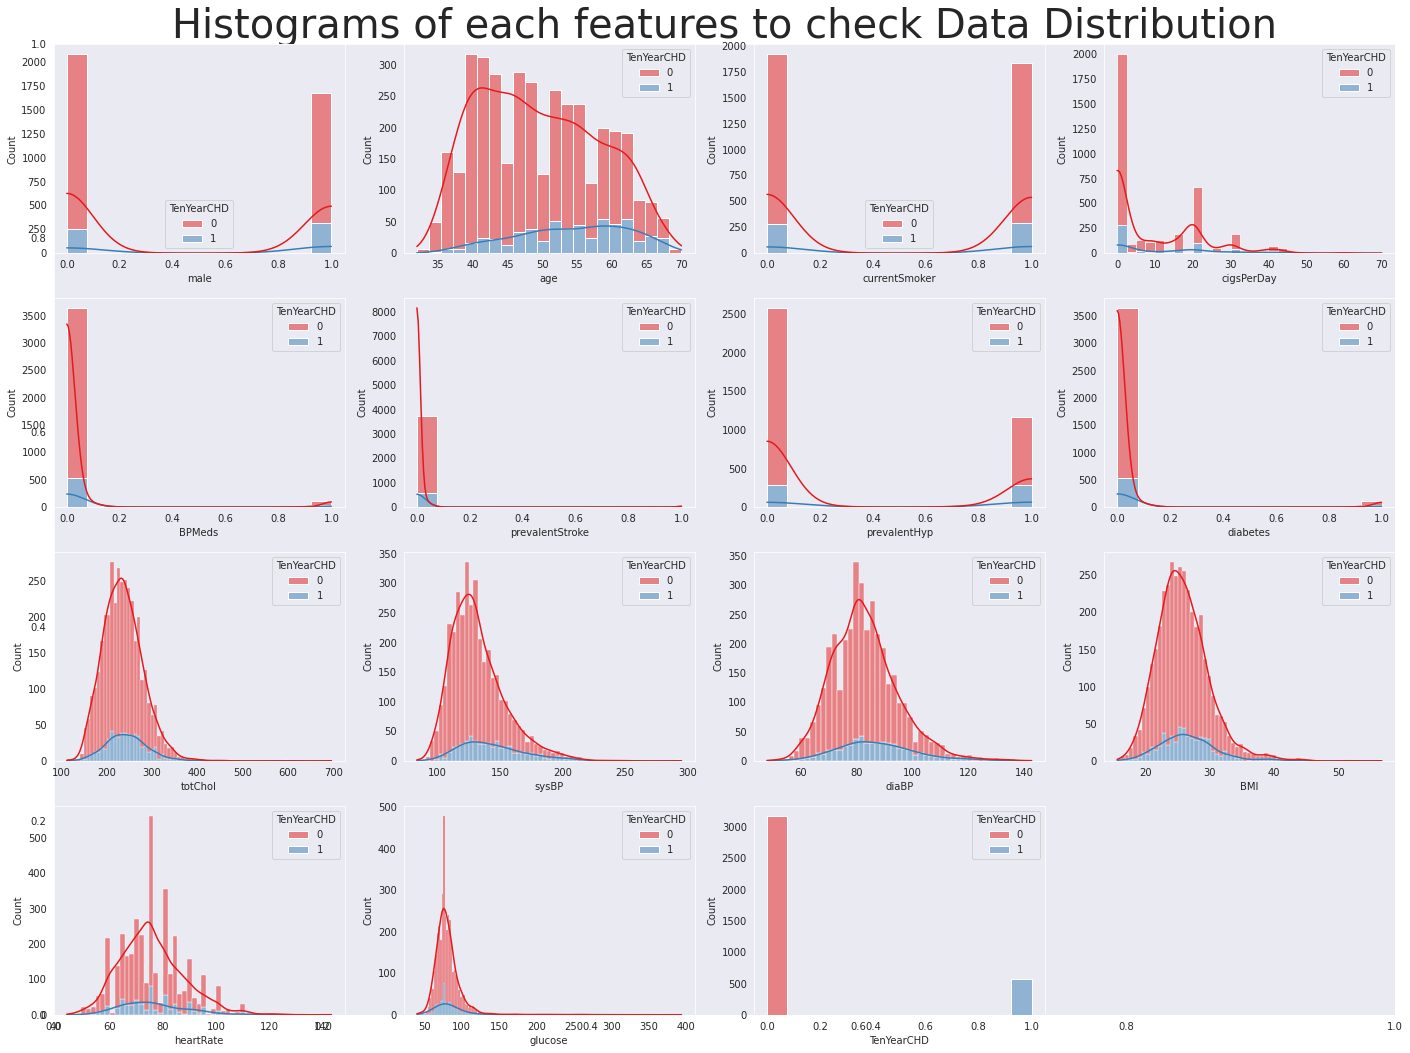

In [ ]:
#Plot histogram of each columns with kde chart and also visualize the data with possibilities of having heart attack or not
fig = plt.figure(figsize=(20,15))
plt.title("Histograms of each features to check Data Distribution", fontsize = 40)
for i in range(len(data.columns)):
  sns.set_style("dark")
  fig.add_subplot(4,4,i+1)
  sns.histplot(x = data.iloc[:,i].dropna(), kde = True, hue = data.TenYearCHD,multiple='stack', palette='Set1')
  plt.xlabel(data.columns[i])

plt.tight_layout()
plt.show()


In [ ]:
#Plot target column and analyze the imbalance in column
px.bar(y = data.TenYearCHD.value_counts(), title = "Imbalance in target column")

In [ ]:
#plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
numeric_corr = data.select_dtypes(include=['int64','float64'])
numeric_corr = numeric_corr.corr()
mask = np.triu(np.ones_like(numeric_corr, dtype=np.bool))
numeric_corr = numeric_corr.mask(mask)

fig = go.Figure(data= go.Heatmap(z=numeric_corr.to_numpy().round(2),
                                 x=numeric_corr.index.values,
                                 y=numeric_corr.columns.values,
                                 colorscale=px.colors.sequential.GnBu,
                                 xgap = 3, ygap = 4
                                 )
                )
fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=800, height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor='rgb(242,242,242)',
                  plot_bgcolor = 'rgb(56,156,166)'
                  )
fig.show()

<ipython-input-17-d9f1f3b2b487>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



We are not getting any significant information from correlation analysis

In [ ]:
#separating features and target 
features = data.drop(columns = ['TenYearCHD']).values
target = data['TenYearCHD'].values

In [ ]:
# Implementing BorutaPy for feature selection with Randomforest classifier as a estimator
rfc = RandomForestClassifier(n_estimators=100, n_jobs=1, class_weight='balanced') #RFC
best_feature = BorutaPy(rfc,n_estimators='auto', verbose = 2) #Implementing BorutaPy
best_feature.fit(features, target) #Train the model for feature selection

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x7F988AF37A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F988AF37A40, verbose=2)

<b>After running for 100 epochs we are getting 10 rejected columns, 2 confirmed columns age and sysBP and one tentative column.</b> 

In [ ]:
#Printing 2 confirmed columns by borutapy
important_feature_BPY =data.columns[:-1][best_feature.support_]
important_feature_BPY

Index(['age', 'sysBP'], dtype='object')

In [ ]:
#to get more precise columns we are implementing recursive feature elimination 
rfeselector = RFE(rfc, n_features_to_select=5, step=1)
rfeselector = rfeselector.fit(features,target)

In [ ]:
#Printing columns which are selected by RFE
important_feature_RFE =data.columns[:-1][rfeselector.support_]
important_feature_RFE

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI'], dtype='object')

In [ ]:
#Ranking of columns by RFE
rfeselector.ranking_

array([ 5,  1,  7,  4,  9, 10,  6,  8,  1,  1,  1,  1,  3,  2])

In [ ]:
{data.columns[i]: rfeselector.ranking_[i] for i in range(len(rfeselector.ranking_))}

{'male': 5,
 'age': 1,
 'currentSmoker': 7,
 'cigsPerDay': 4,
 'BPMeds': 9,
 'prevalentStroke': 10,
 'prevalentHyp': 6,
 'diabetes': 8,
 'totChol': 1,
 'sysBP': 1,
 'diaBP': 1,
 'BMI': 1,
 'heartRate': 3,
 'glucose': 2}

In [ ]:
#Final best features to train mljar
final_feature = data[important_feature_RFE].values
final_feature

array([[ 39.  , 195.  , 106.  ,  70.  ,  26.97],
       [ 46.  , 250.  , 121.  ,  81.  ,  28.73],
       [ 48.  , 245.  , 127.5 ,  80.  ,  25.34],
       ...,
       [ 52.  , 269.  , 133.5 ,  83.  ,  21.47],
       [ 40.  , 185.  , 141.  ,  98.  ,  25.6 ],
       [ 39.  , 196.  , 133.  ,  86.  ,  20.91]])

In [ ]:
#Data imbalance in target column
Counter(target)

Counter({0: 3179, 1: 572})

In [ ]:
#Implementing SMOTE for balancing the dataset  
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_smote, y_smote = pipeline.fit_resample(final_feature, target)

In [ ]:
#Target column after SMOTE
Counter(y_smote)

Counter({0: 3178, 1: 2543})

In [ ]:
#Target columns visualization before and after smote
fig = make_subplots(
    rows = 1, cols = 2,
    subplot_titles=('Target distribution before SMOTE','Target distribution after SMOTE')
)
fig.add_trace(go.Histogram(x = target),row = 1, col = 1)
fig.add_trace(go.Histogram(x = y_smote),row = 1, col = 2)
fig.update_layout(height=550, width=700,barmode = 'group',bargap = 0.30,
                  title_text="Target balancing using SMOTE")

In [ ]:
x_smote.shape, y_smote.shape

((5721, 5), (5721,))

In [ ]:
final_features = pd.DataFrame(x_smote, columns = important_feature_RFE)

In [ ]:
important_feature_RFE

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI'], dtype='object')

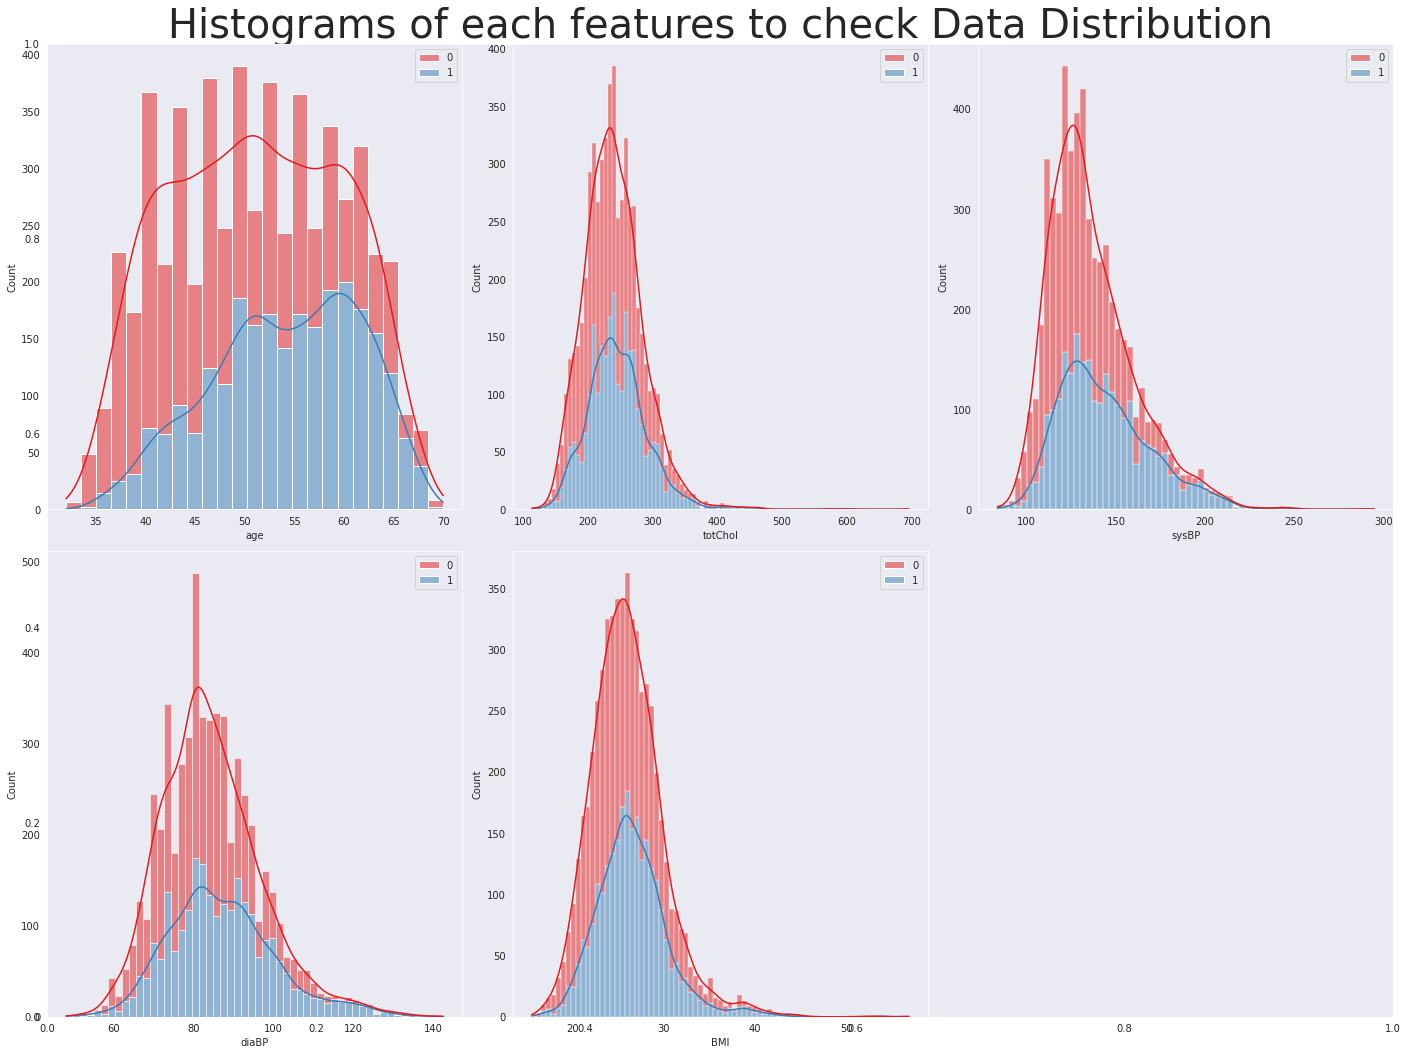

In [ ]:
#Data distribution of final five features 
fig = plt.figure(figsize=(20,15))
plt.title("Histograms of each features to check Data Distribution", fontsize = 40)
for i in range(len(final_features.columns)):
  sns.set_style("dark")
  fig.add_subplot(2,3,i+1)
  sns.histplot(x = final_features.iloc[:,i].dropna(), kde = True, hue = y_smote,multiple='stack', palette='Set1')
  plt.xlabel(final_features.columns[i])

plt.tight_layout()
plt.show()

<b>Based on histogram analysis we can say that some columns are highly skewed and to make columns normally distributed we are using Quantile transformation</b>

In [ ]:
#Implementation of quantile transformation
temp_ff = final_features.copy()
qt = QuantileTransformer(n_quantiles=10, random_state=0)
temp_ff = qt.fit_transform(temp_ff)

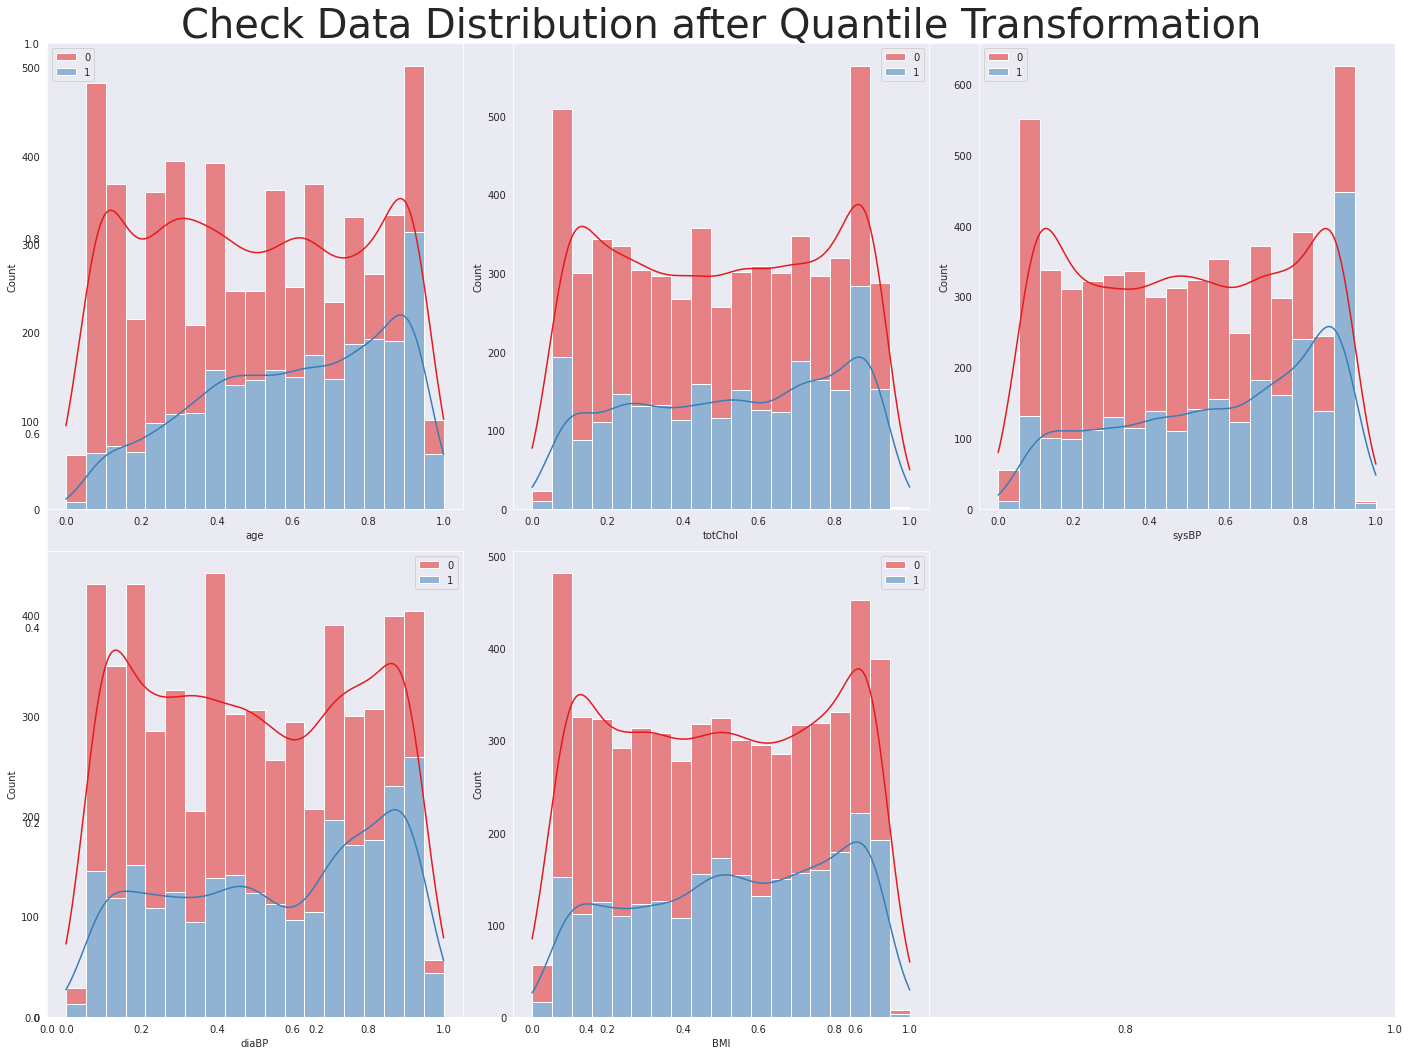

In [ ]:
#Ploting the features after feature transformation 
temp_ff = pd.DataFrame(temp_ff, columns = important_feature_RFE)
temp_ff
fig = plt.figure(figsize=(20,15))
plt.title("Check Data Distribution after Quantile Transformation", fontsize = 40)
for i in range(len(final_features.columns)):
  sns.set_style("dark")
  fig.add_subplot(2,3,i+1)
  sns.histplot(x = temp_ff.iloc[:,i].dropna(), kde = True, hue = y_smote,multiple='stack', palette='Set1')
  plt.xlabel(final_features.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
#Spliting the dataset in to train test 
x_train, x_test, y_train, y_test = tts(temp_ff.values, y_smote, test_size=0.3, random_state=42)

In [ ]:
#Implementing mljar-automl
automl = AutoML(mode = 'Explain', results_path='AutoML_30',features_selection=True )

In [ ]:
automl.fit(x_train, y_train)

AutoML directory: AutoML_30
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'insert_random_feature', 'features_selection', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.687636 trained in 0.52 seconds


2_DecisionTree logloss 0.609283 trained in 14.61 seconds
3_Linear logloss 0.623045 trained in 3.39 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.390415 trained in 7.62 seconds
5_Default_NeuralNetwork logloss 0.607216 trained in 2.47 seconds
6_Default_RandomForest logloss 0.583516 trained in 5.43 seconds
* Step insert_random_feature will try to check up to 1 model
4_Default_Xgboost_RandomFeature logloss 0.40323 trained in 2.8 seconds
Drop features ['random_feature']
Skip features_selection because no parameters were generated.
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.390415 trained in 0.91 seconds
AutoML fit time: 54.62 seconds
AutoML best model: 4_Default_Xgboost


AutoML(features_selection=True, results_path='AutoML_30')

<b>
Algorithms used : 'Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network'<br>
Stes : 'simple_algorithms', 'default_algorithms', 'insert_random_feature', 'features_selection', 'ensemble'<br>
Best Algorithm : XGBOOST
</b>

In [ ]:
#Predicting model with mljar's xgbost 
y_pred = automl.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#Printing the classification report of model 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       967
           1       0.83      0.77      0.80       750

    accuracy                           0.83      1717
   macro avg       0.83      0.82      0.83      1717
weighted avg       0.83      0.83      0.83      1717



<b>Accuracy : 83% <br>Macro Avg. : 83 <br><u>Satisfied result</b>

#<b><i>Approach we have taken to solve problems in this project</b></i><br>
---
<ul>
<li>
Fisrt we analyse entire datset. Such as : number of columns and rows, which columns have null values, percentage of null values.  
</li>
<li>
Then, removed education columns which doesn't have any relation with problem statement. And, for missing values, we decide to remove all the null values because this is human errors and we cannot just randomly fill these values. 
</li>
<li>
In third step, we have done various data distribution analysis, and did correlation analysis of columns. unfortunatly we haven't figure out anything from correlation analysis. 
</li>
<li>
Then, we decided to use borutapy and recursive feature elimination to do feature selection. Based on both the method we finalized five features for modeling. 
</li>
<li>
After feature selection we see that target column is extremely imbalanced. so, to solve this problem we used SMOTE which provides logical sample of data to encounter imbalance of data. 
</li>
<li>
In final step we check data distribution for the final time, and we analyzed that some of the features are highly skewed. Therefore, we have used quantile transformation to make data normally distributed. 
</li>
<li>
After doing all the data preprocessing, we implemented model using mljar technique, which consist of various models, however the best model is <b>xgboost</b> which gave 83% accuracy.
</li>  
